
# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

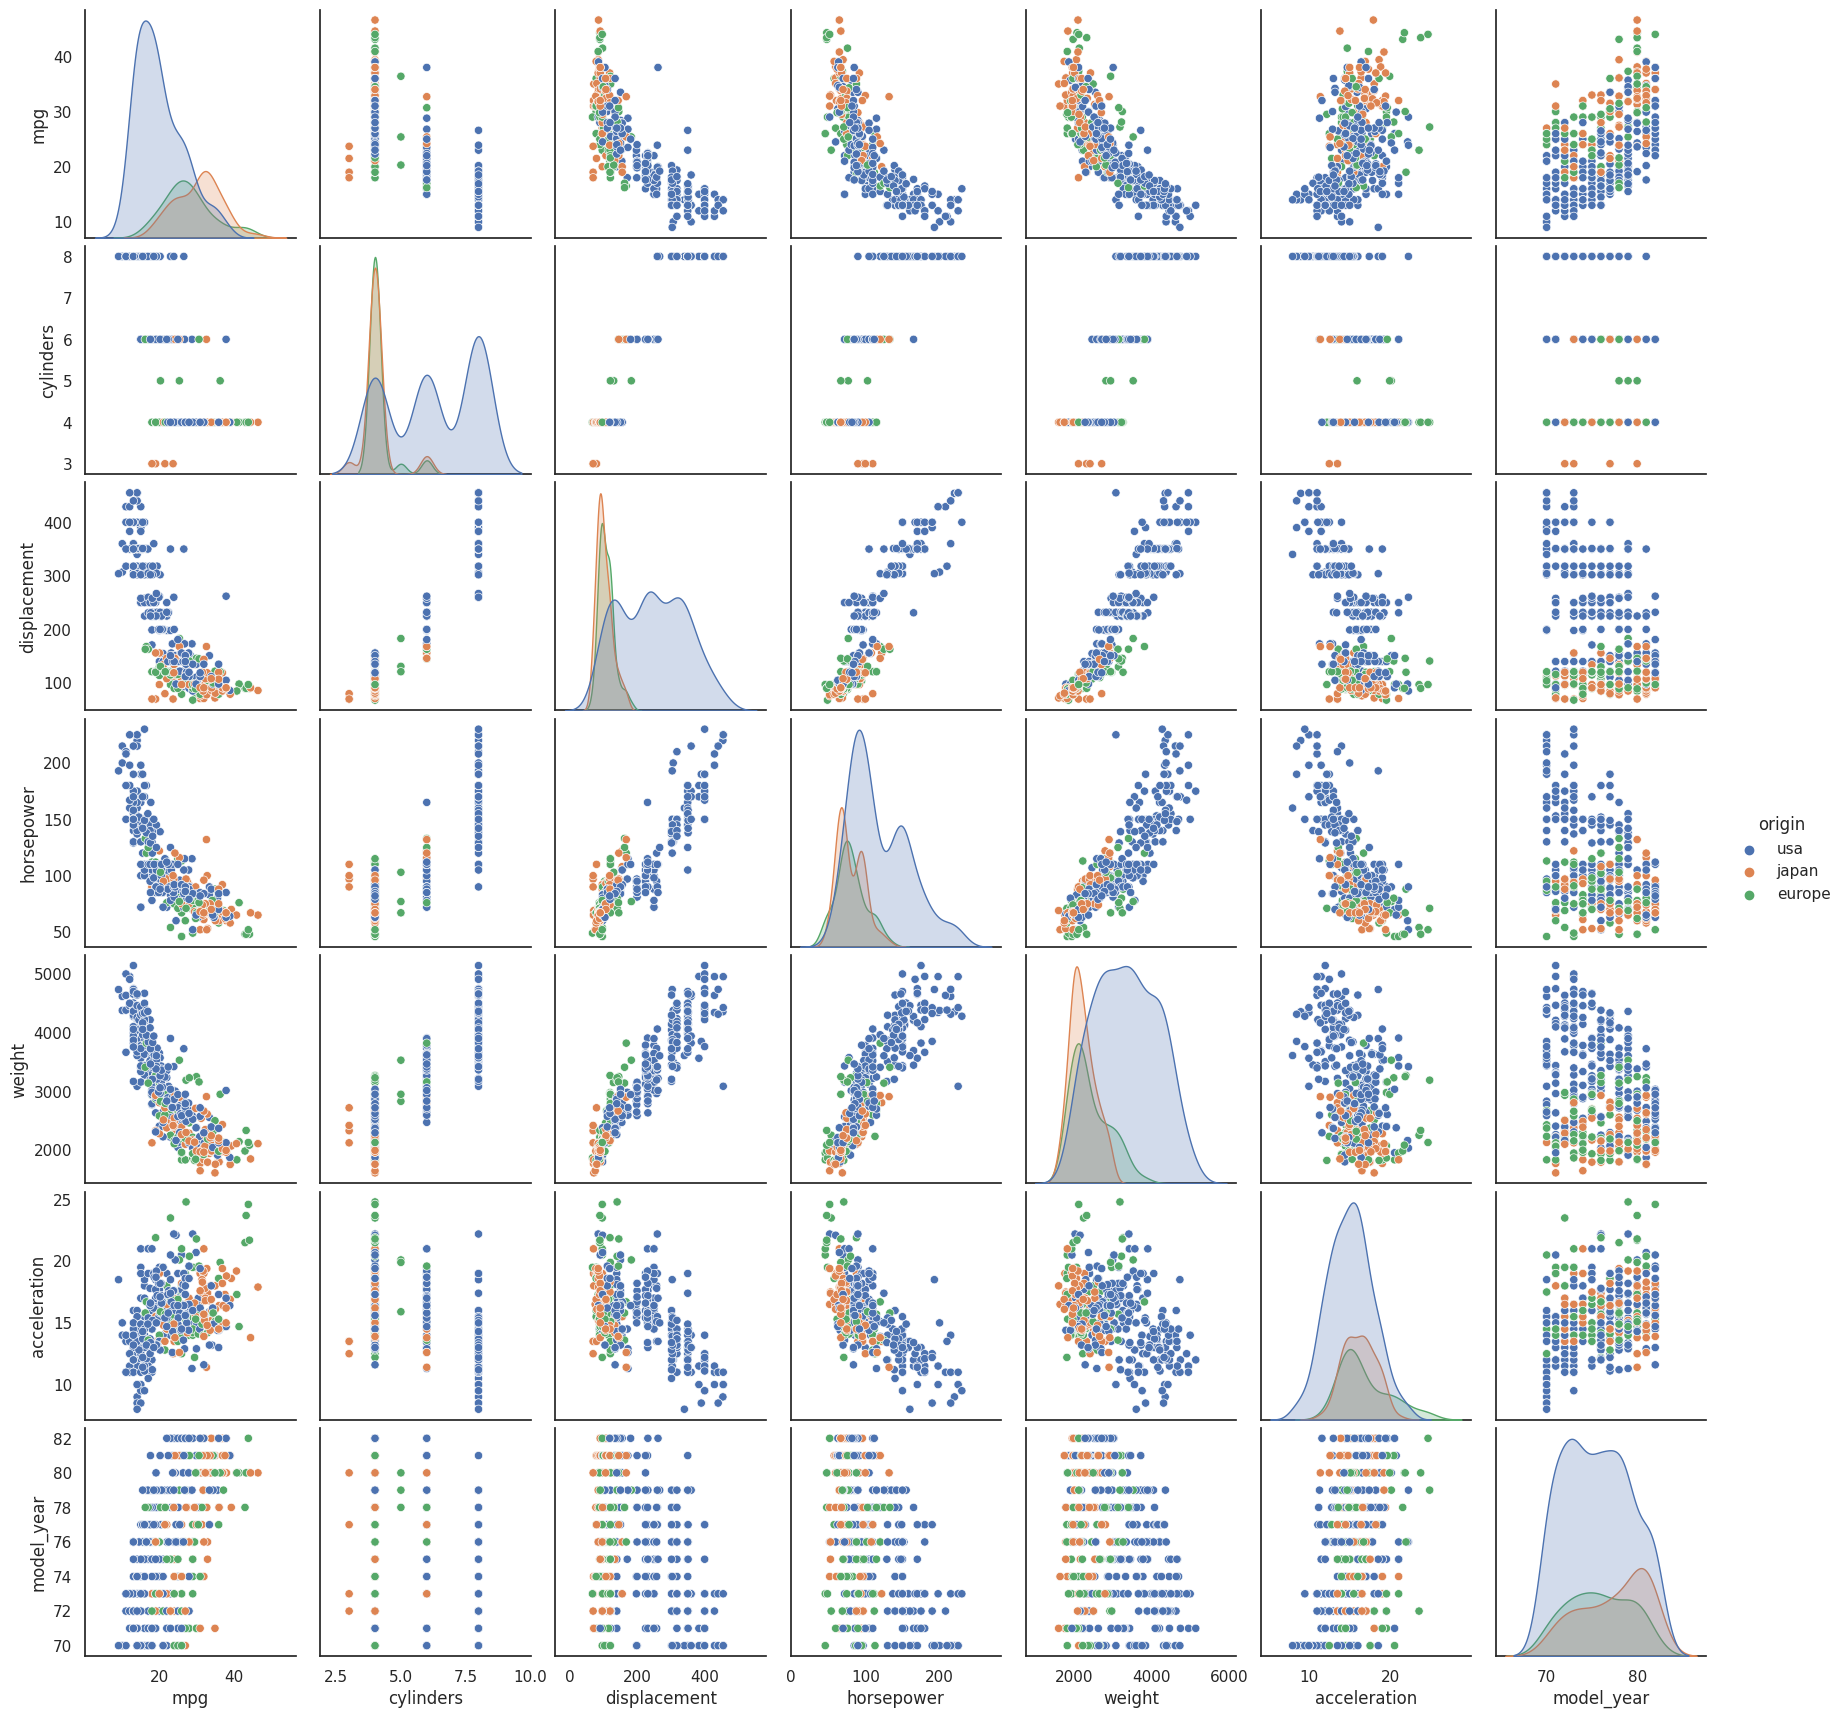

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")


# Mostrar la matriz completa de datos
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
#pd.set_option('display.max_rows', None)  # Mostrar todas las filas
#print(mpg)

# Crear un gráfico de dispersión para visualizar los datos
sns.pairplot(mpg, hue="origin")






2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

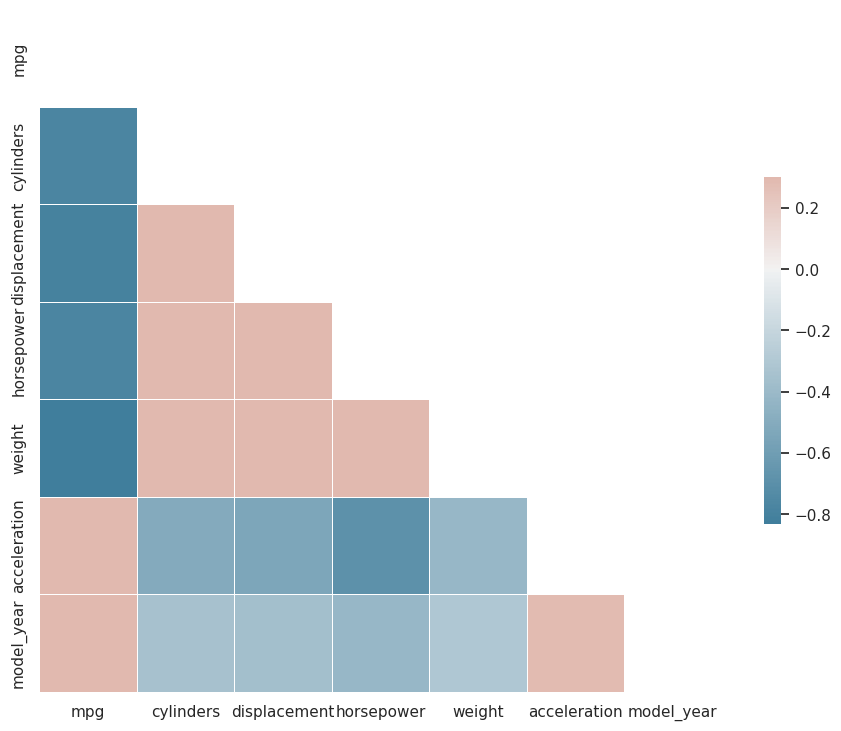

In [3]:
import numpy as np

# Compute the correlation matrix
# Compute the correlation matrix considering only numeric columns
corr = mpg.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Eliminar las Filas con Valores Faltantes
mpg = mpg.dropna()

# Mostrar la matriz completa de datos
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
#pd.set_option('display.max_rows', None)  # Mostrar todas las filas
#print(mpg)

# Variables predictoras: todas las columnas excepto 'mpg', 'origin' y 'name'
X = mpg.drop(columns=['mpg', 'origin', 'name'])

# Variable objetivo
y = mpg['mpg']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

#Algunos metodos para medir el desempeño de un modelo de Regresión Lineal

**Error Cuadrático Medio (MSE):** El Error Cuadrático Medio es una medida que cuantifica el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Cuanto menor sea el MSE, mejor será el modelo. La fórmula del MSE es:

\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

Donde ($n$) es el número de muestras, ($y_i$) son los valores reales y ($\hat{y}_i$) son las predicciones del modelo.

**Raíz del Error Cuadrático Medio (RMSE):** El RMSE es simplemente la raíz cuadrada del MSE. Proporciona una medida del error en la misma unidad que la variable dependiente. Cuanto menor sea el RMSE, mejor será el modelo.

**Coeficiente de Determinación (($R^2$)):** El ($R^2$) es una medida de qué tan bien el modelo se ajusta a los datos. Representa la proporción de la varianza en la variable dependiente que es explicada por el modelo. Un ($R^2$) de 1 indica un ajuste perfecto, mientras que un ($R^2$) de 0 indica que el modelo no explica nada de la variabilidad en los datos.

\begin{equation}
R^2 = 1 - \frac{MSE(model)}{MSE(mean)}
\end{equation}

Donde ($MSE(model)$) es el MSE del modelo y ($MSE(mean)$) es el MSE si simplemente se predijera la media de la variable dependiente.

**Error Absoluto Medio (MAE):** El Error Absoluto Medio es la media de los valores absolutos de los errores entre las predicciones y los valores reales. Es menos sensible a valores atípicos que el MSE. La fórmula del MAE es:

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

**Error Porcentual Absoluto Medio (MAPE):** El MAPE es una medida de error relativo que calcula el promedio de los errores porcentuales entre las predicciones y los valores reales. Es útil para interpretar el error en términos porcentuales. La fórmula del MAPE es:

\begin{equation}
MAPE = \frac{100}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right|
\end{equation}

Estas son algunas de las estadísticas comunes utilizadas para evaluar el desempeño de un modelo de regresión lineal. La elección de la métrica a utilizar depende del contexto del problema y de los objetivos específicos de la evaluación del modelo.

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from sklearn.metrics import f1_score

 # Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE
rmse = math.sqrt(mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular los errores porcentuales
errors = abs((y_test - y_pred) / y_test)

# Calcular el MAPE
mape = (100 / len(y_test)) * errors.sum()

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Coeficiente de Determinación (R^2): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Porcentual Absoluto Medio (MAPE): {mape}')

Error Cuadrático Medio (MSE): 11.878262288865706
Raíz del Error Cuadrático Medio (RMSE): 3.446485498136574
Coeficiente de Determinación (R^2): 0.8088938602131774
Error Absoluto Medio (MAE): 2.6724608826273153
Error Porcentual Absoluto Medio (MAPE): 12.217417534349723


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


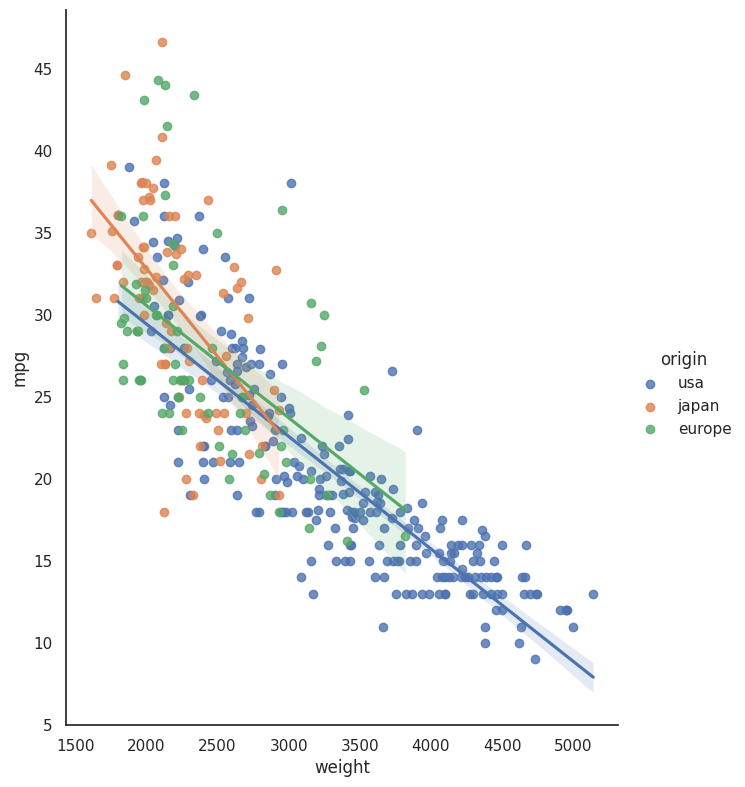

In [6]:
#sns.pairplot(mpg, x_vars=["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"], y_vars=['mpg'], hue="origin", height=6, aspect=.8, kind="reg")
sns.pairplot(mpg, x_vars=["weight"], y_vars=['mpg'], hue="origin", height=8, aspect=.8, kind="reg")

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.